## Data sets

In [1]:
from sklearn import datasets

%timeit -n10 datasets.load_iris()

10 loops, best of 3: 895 µs per loop


## Data frames

In [2]:
import pandas as pd

iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
%timeit -n10 multiplied = df.multiply(df)
multiplied = df.multiply(df)

10 loops, best of 3: 236 µs per loop


In [11]:
multiplied.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04


## Visualization

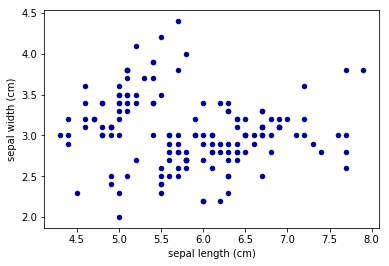

In [13]:
%matplotlib inline
df.plot.scatter(x='sepal length (cm)',y='sepal width (cm)',c='DarkBlue')

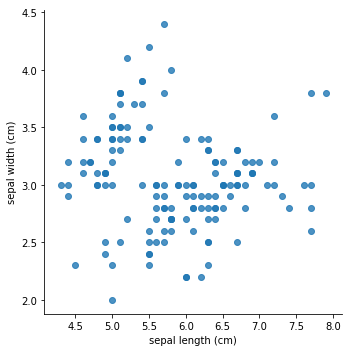

In [14]:
import seaborn as sns

sns.lmplot('sepal length (cm)', from sklearn import linear_model'sepal width (cm)', data=df, fit_reg=False)

## Linear regression

In [31]:
from sklearn import linear_model

data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])

X = df
y = target["MEDV"]

lm = linear_model.LinearRegression()

[ 30.00821269  25.0298606   30.5702317   28.60814055  27.94288232]


In [46]:
%timeit -n10 model = lm.fit(X,y)

model = lm.fit(X,y)

10 loops, best of 3: 976 µs per loop


In [47]:
%timeit -n10 predictions = lm.predict(X[0:5])

predictions = lm.predict(X[0:5])
print(predictions)

The slowest run took 52.77 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 138 µs per loop
[ 30.00821269  25.0298606   30.5702317   28.60814055  27.94288232]


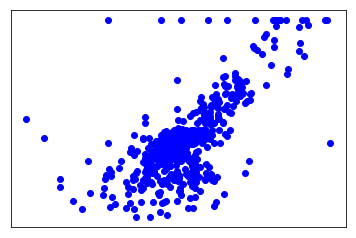

In [43]:
import matplotlib.pyplot as plt

plt.scatter(X["RM"], y,  color='blue')
plt.xticks(())
plt.yticks(())

plt.show()

## Decision tree

In [5]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

In [9]:
from sklearn import tree
X = iris.data
Y = iris.target

clf = tree.DecisionTreeClassifier()

In [10]:
%timeit -n10 clf.fit(X, Y)

10 loops, best of 3: 326 µs per loop


## Tensorflow

In [11]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [23]:
import tensorflow as tf

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [24]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [25]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [26]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9176


In [22]:
tf.train.write_graph(sess.graph_def, '.', 'mnist_grill.pb', as_text=True)    

'./mnist_grill.pb'